In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict

In [77]:
def simpleSimulator(temperatures):
    output=[]
    t = 20
    for i in range(len(temperatures)):
        t = (t+temperatures[i]) /2 if t<=temperatures[i] else  ( 3*t+temperatures[i] )/4
        output += [round(t,1)]
    return output

In [101]:
data_t=[15, 20, 10, 5, 10, 20, 25 ,30, 30, 30, 20]

In [612]:
def parseFile2Array(filename):
    arr=[]
    file = open(filename,'r')
    for line in file:
        arr += [ (float) (line.strip().replace("\n",''))  ]
    return arr

In [613]:
d1=parseFile2Array("JAN0107.txt")
d2 = parseFile2Array("APR0814.txt")
d3=parseFile2Array("AUG0107.txt")
d4=parseFile2Array("OCT0107.txt")
data=d1+d2+d3+d4

In [629]:
len(d1),len(d2),len(d3),len(d4)

(167, 168, 168, 168)

In [614]:
data_year = data*13

### Q1

In [618]:
q1_1=simpleSimulator(d1)
q1_1[len(q1_1)-1]

2.2

Text(0.5,1,'Tempertures for simple first step simulator of JAN0107.txt')

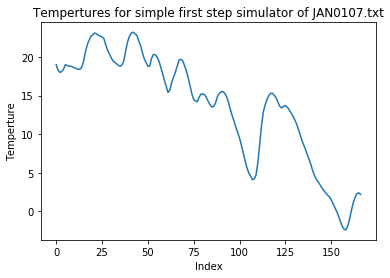

In [957]:
plot_d = q1_1
plt.plot([ i for i in range(len(plot_d))], plot_d)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple first step simulator of JAN0107.txt')

In [619]:
q1_2=simpleSimulator(d2)
q1_2[len(q1_2)-1]

25.0

Text(0.5,1,'Tempertures for simple first step simulator of APR0814.txt')

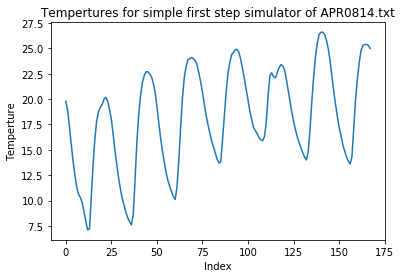

In [956]:
plot_d = q1_2
plt.plot([ i for i in range(len(plot_d))], plot_d)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple first step simulator of APR0814.txt')

In [620]:
q1_3=simpleSimulator(d3)
q1_3[len(q1_3)-1]

28.2

Text(0.5,1,'Tempertures for simple first step simulator of AUG0107.txt')

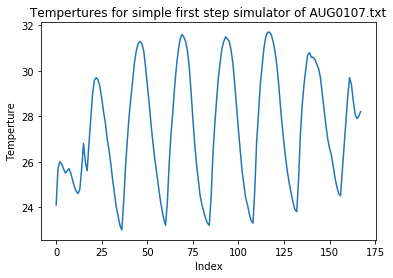

In [958]:
plot_d = q1_3
plt.plot([ i for i in range(len(plot_d))], plot_d)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple first step simulator of AUG0107.txt')

In [621]:
q1_4=simpleSimulator(d4)
q1_4[len(q1_4)-1]

26.4

Text(0.5,1,'Tempertures for simple first step simulator of OCT0107.txt')

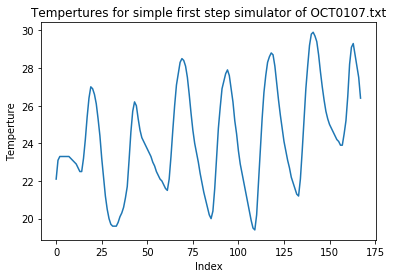

In [959]:
plot_d = q1_4
plt.plot([ i for i in range(len(plot_d))], plot_d)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple first step simulator of OCT0107.txt')

In [624]:
q1=simpleSimulator(data)
len(q1)

671

In [630]:
q1[167],q1[335],q1[503],q1[670]

(10.7, 26.7, 27.2, 26.4)

In [946]:
year_simple = simpleSimulator(data_year)

Text(0.5,1,'Tempertures foo simple first step simulator')

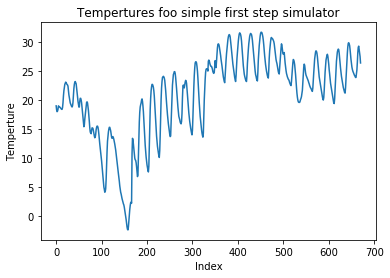

In [948]:
plt.plot([ i for i in range(len(q1))], q1)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures foo simple first step simulator')

Text(0.5,1,'Tempertures foo simple first step simulator')

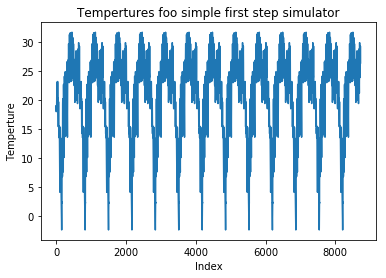

In [947]:
plt.plot([ i for i in range(len(year_simple))], year_simple)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures foo simple first step simulator')

### Q2

In [911]:
choice_dict=dict({'S':1,'C':2,'N':3,'H':4,'O':5})
choice_dict_r=['','S','C','N','H','O']
choice_v=[0,-5,-2,0,1,6]

In [912]:
def oriChangeFunc(t_o,t):
    return (t_o+t) /2 if t_o<=t else  ( 3*t_o+t )/4

In [913]:
def newChangeFunc(t_o,t):
    return ( 7*t_o+t )/8 if t_o>t else  ( 3*t_o+t )/4

In [914]:
def controlSimulator_optimize(temperatures,r,changeFunc,std_cents,std_times):
    #S,C,N,H,O
    #choice=[-5,-2,0,1,6]
    
    #t_cents=sum_cent[len(output)-1]
    #t_o_times=sum_over_time[len(output)-1]
    
    
    t = changeFunc(20,temperatures[0])
    all_choices=[['S'],['C'],['N'],['H'],['O']]
    all_cent=[49,12,0,5,39]
    all_t=[t-5,t-2,t,t+1,t+6]
    all_times=[]
    
    for i in range(5):
        if(all_t[i]>20+r or all_t[i] <20-r ):
            all_times+=[1]
        else:
            all_times+=[0]
    
    
    for i in range(1,len(temperatures)):
        
        remove_all_choices=list(all_choices)
        remove_all_t=list(all_t)
        remove_all_times=list(all_times)
        remove_all_cents=list(all_cent)
        
        for ci in range(len(all_choices)):
#             print(all_choices[ci],i,ci)
            choice=all_choices[ci]
            
#             print(choice+['s'])
            
            now_t = changeFunc(all_t[ci],temperatures[i])
            
            t=now_t-5
            all_t.append(t)
            all_choices.append(choice+['S'])
            all_cent.append(all_cent[ci]+49)
            if(t>20+r or t <20-r):
                all_times.append(all_times[ci]+1)
            else:
                all_times.append(all_times[ci])
                
            t=now_t-2
            all_t.append(t)
            all_choices.append(choice+['C'])
            all_cent.append(all_cent[ci]+12)
            if(t>20+r or t <20-r):
                all_times.append(all_times[ci]+1)
            else:
                all_times.append(all_times[ci])
                
            t=now_t
            all_t.append(t)
            all_choices.append(choice+['N'])
            all_cent.append(all_cent[ci])
            if(t>20+r or t <20-r):
                all_times.append(all_times[ci]+1)
            else:
                all_times.append(all_times[ci])
                
            t=now_t+1
            all_t.append(t)
            all_choices.append(choice+['H'])
            all_cent.append(all_cent[ci]+5)
            if(t>20+r or t <20-r):
                all_times.append(all_times[ci]+1)
            else:
                all_times.append(all_times[ci])
                
            t=now_t+6
            all_t.append(t)
            all_choices.append(choice+['O'])
            all_cent.append(all_cent[ci]+39)
            if(t>20+r or t <20-r):
                all_times.append(all_times[ci]+1)
            else:
                all_times.append(all_times[ci])
                
            
        #remove not useful choices
        for r in range(len(remove_all_cents),len(all_times)):
            if(all_times[r]>std_times):
                remove_all_choices.append(all_choices[r])
                remove_all_t.append(all_t[r])
                remove_all_times.append(all_times[r])
                remove_all_cents.append(all_cent[r])
#         print(remove_all_choices)
                
        for r in range(len(remove_all_choices)):
            all_choices.remove(remove_all_choices[r])
            all_t.remove(remove_all_t[r])
            all_times.remove(remove_all_times[r])
            all_cent.remove(remove_all_cents[r])
        print(all_choices)
            
        
    
    opt_index=0
    min_times =9999999999999999
    for i in range(len(all_times)):
        if(min_times>all_times[i]):
            min_times=all_times[i]
    min_cents =99999999999999999
    for i in range(len(all_cent)):
        if(min_times==all_times[i] and min_cents>all_cent[i]):
            min_cents=all_cent[i]
            opt_index=i
            
    return all_choices[opt_index]

In [915]:
def nearest_choice_max(now_t,max_t,S,O):
    if(now_t-5>max_t):
        return 'S',-1000
    loop_index=1
    changed_t = now_t
    while(loop_index<=5):
        if(now_t+choice_v[loop_index]<=max_t):
            changed_t = now_t+choice_v[loop_index]
            loop_index+=1
        else:
            break
    if(loop_index-1 ==S):
        loop_index+=1
        changed_t = now_t+choice_v[loop_index-1]
    elif(loop_index-1 ==O):
        loop_index-=1
        changed_t = now_t+choice_v[loop_index-1]
        
    return choice_dict_r[loop_index-1],changed_t
    

In [916]:
def nearest_choice_min(now_t,min_t,S,O):
    if(now_t+6<min_t):
        return 'O',-1000
    loop_index=5
    changed_t = now_t
    while(loop_index>0):
        if(now_t+choice_v[loop_index]>=min_t):
            changed_t = now_t+choice_v[loop_index]
            loop_index-=1
        else:
            break
    if(loop_index-1 ==S):
        loop_index+=1
        changed_t = now_t+choice_v[loop_index-1]
    elif(loop_index-1 ==O):
        loop_index-=1
        changed_t = now_t+choice_v[loop_index-1]
        
    return choice_dict_r[loop_index+1],changed_t

In [917]:
def try_up(changeFunc,start,end,df,max_t,min_t,S,O):
    now_t= df.iloc[start,1]  - choice_v[choice_dict[df.iloc[start,2]]]
    choices=[]
    
    c,now_t = nearest_choice_max(now_t,max_t,S,O)
    if(now_t>max_t or now_t < min_t):
        return False,[],[]
    else:
        choices+=[c]
            
    for i in range(start+1,end+1):
        now_t = changeFunc(now_t,df.iloc[i,0])
        c,now_t = nearest_choice_max(now_t,max_t,S,O)
        if(now_t>max_t or now_t < min_t):
            return False,[],[]
        else:
            choices+=[c]
    return True,choices,now_t

In [918]:
def try_down(changeFunc,start,end,df,max_t,min_t,S,O):
    now_t= df.iloc[start,1]  - choice_v[choice_dict[df.iloc[start,2]]]
    choices=[]
    
    c,now_t = nearest_choice_min(now_t,min_t,S,O)
    if(now_t>max_t or now_t < min_t):
        return False,[],[]
    else:
        choices+=[c]
            
    for i in range(start+1,end+1):
        now_t = changeFunc(now_t,df.iloc[i,0])
        c,now_t = nearest_choice_min(now_t,min_t,S,O)
        if(now_t>max_t or now_t < min_t):
            return False,[],[]
        else:
            choices+=[c]
    return True,choices,now_t

In [919]:
def optimize_frag(changeFunc,start,end,df,max_t,min_t,S,O):
    if(start==end): 
        return False,[],[]
    #3
    found,choices,ts = try_up(changeFunc,start,end,df,max_t,min_t,1,5)
    if(found):
        return True,choices,ts
    found,choices,ts = try_down(changeFunc,start,end,df,max_t,min_t,1,5)
    if(found):
        return True,choices,ts
    
    if(S==1 and O==5):
        return False,[],[]
    
    #4
    if(S!=1 and O==5):
        no=1
    else:
        found,choices,ts = try_up(changeFunc,start,end,df,max_t,min_t,1,-10)
        if(found):
            return True,choices,ts
        found,choices,ts = try_down(changeFunc,start,end,df,max_t,min_t,1,-10)
        if(found):
            return True,choices,ts
    if(S==1 and O!=5):
        return False,[],[]
        
    #4
    found,choices,ts = try_up(changeFunc,start,end,df,max_t,min_t,-10,5)
    if(found):
        return True,choices,ts
    found,choices,ts = try_down(changeFunc,start,end,df,max_t,min_t,-10,5)
    if(found):
        return True,choices,ts
    
    if(S!=1 and O==5):
        return False,[],[]

    #5
    found,choices,ts = try_up(changeFunc,start,end,df,max_t,min_t,-10,-10)
    if(found):
        return True,choices,ts
    
    else:
        return try_down(changeFunc,start,end,df,max_t,min_t,-10,-10)


In [920]:
def OutputFromChoices(temperatures,choose_op,r,changeFunc):
    output=[]
    sum_cent=[]
    over_degree=[]
    sum_over_time=[]
    sum_over_degree=[]
    
    
    t = 20
    for i in range(len(temperatures)):
        t = changeFunc(t,temperatures[i])
        
        if(choose_op[i]=='C'):
            t-=2
        elif(choose_op[i]=='S'):
            t-=5
        elif(choose_op[i]=='H'):
            t+=1
        elif(choose_op[i]=='O'):
            t+=6
        
        #output += [round(t,1)]
        output += [t]
        
        
    #cal info
    
    #for initial value
    if(choose_op[0]=='C'):
        sum_cent+=[12]
    elif(choose_op[0]=='S'):
        sum_cent+=[49]
    elif(choose_op[0]=='H'):
        sum_cent+=[5]
    elif(choose_op[0]=='O'):
        sum_cent+=[39]
    else:
        sum_cent+=[0]
        
    if(output[0] >20+r):
        over_degree+=[abs(output[0] -20-r )]
        sum_over_degree+=[ over_degree[0]]
        sum_over_time+=[1]
    elif(output[0] <20-r):
        over_degree+=[abs(output[0] -20+r )]
        sum_over_degree+=[ over_degree[0]]
        sum_over_time+=[1]
    else:
        over_degree+=[0]
        sum_over_degree+=[ over_degree[0]]
        sum_over_time+=[0]
        
    
    for i in range(1,len(output)):
        if(choose_op[i]=='C'):
            sum_cent+=[sum_cent[i-1]+12]
        elif(choose_op[i]=='S'):
            sum_cent+=[sum_cent[i-1]+49]
        elif(choose_op[i]=='H'):
            sum_cent+=[sum_cent[i-1]+5]
        elif(choose_op[i]=='O'):
            sum_cent+=[sum_cent[i-1]+39]
        else:
            sum_cent+=[sum_cent[i-1]]
        
        if(output[i] >20+r):
            over_degree+=[abs(output[i] -20-r )]
            sum_over_degree+=[ sum_over_degree[i-1]+over_degree[i]]
            sum_over_time+=[sum_over_time[i-1]+1]
        elif(output[i] <20-r):
            over_degree+=[abs(output[i] -20+r )]
            sum_over_degree+=[ sum_over_degree[i-1]+over_degree[i]]
            sum_over_time+=[sum_over_time[i-1]+1]
        else:
            over_degree+=[0]
            sum_over_degree+=[ sum_over_degree[i-1]]
            sum_over_time+=[sum_over_time[i-1]]
            
    #change output formate
    f_output=pd.DataFrame(data={
        'External T':temperatures,
        'Interal T':output,
        'Operation':choose_op,
        'Total Cents':sum_cent,
        'Over Degrees': over_degree ,
        'Over Times':sum_over_time,
        'Sum of the Degrees':sum_over_degree 
    },columns=['External T', 'Interal T','Operation','Total Cents','Over Degrees','Over Times','Sum of the Degrees'])
            
    return f_output

In [921]:
def controlSimulator(temperatures,ini_t,r,changeFunc,Optimize,Optimize_by_frag,S=-10,O=-10):
    
    output=[]
    choose_op=[]
    sum_cent=[]
    over_degree=[]
    sum_over_time=[]
    sum_over_degree=[]
    
    
    t = ini_t
    for i in range(len(temperatures)):
        t = changeFunc(t,temperatures[i])
        
        if(t>20+r):
            if(t-20-r<=2 or S==1):
                t-=2;
                choose_op+=['C'];
            else:
                t-=5;
                choose_op+=['S'];
            
        elif(t<20-r):
            if(20-r-t<=1 or O==5):
                t+=1;
                choose_op+=['H'];
            else:
                t+=6;
                choose_op+=['O'];
            
        else:
            choose_op+=['N'];
        
        #output += [round(t,1)]
        output += [t]
        
        
    #cal info
    
    #for initial value
    if(choose_op[0]=='C'):
        sum_cent+=[12]
    elif(choose_op[0]=='S'):
        sum_cent+=[49]
    elif(choose_op[0]=='H'):
        sum_cent+=[5]
    elif(choose_op[0]=='O'):
        sum_cent+=[39]
    else:
        sum_cent+=[0]
        
    if(output[0] >20+r):
        over_degree+=[abs(output[0] -20-r )]
        sum_over_degree+=[ over_degree[0]]
        sum_over_time+=[1]
    elif(output[0] <20-r):
        over_degree+=[abs(output[0] -20+r )]
        sum_over_degree+=[ over_degree[0]]
        sum_over_time+=[1]
    else:
        over_degree+=[0]
        sum_over_degree+=[ over_degree[0]]
        sum_over_time+=[0]
        
    
    for i in range(1,len(output)):
        if(choose_op[i]=='C'):
            sum_cent+=[sum_cent[i-1]+12]
        elif(choose_op[i]=='S'):
            sum_cent+=[sum_cent[i-1]+49]
        elif(choose_op[i]=='H'):
            sum_cent+=[sum_cent[i-1]+5]
        elif(choose_op[i]=='O'):
            sum_cent+=[sum_cent[i-1]+39]
        else:
            sum_cent+=[sum_cent[i-1]]
        
        if(output[i] >20+r):
            over_degree+=[abs(output[i] -20-r )]
            sum_over_degree+=[ sum_over_degree[i-1]+over_degree[i]]
            sum_over_time+=[sum_over_time[i-1]+1]
        elif(output[i] <20-r):
            over_degree+=[abs(output[i] -20+r )]
            sum_over_degree+=[ sum_over_degree[i-1]+over_degree[i]]
            sum_over_time+=[sum_over_time[i-1]+1]
        else:
            over_degree+=[0]
            sum_over_degree+=[ sum_over_degree[i-1]]
            sum_over_time+=[sum_over_time[i-1]]
            
            
            
    if(Optimize=='True'):
        f_choice = controlSimulator_optimize(temperatures,r,changeFunc,sum_cent[len(output)-1],sum_over_time[len(output)-1])
        return f_choice
            
    #change output formate
    f_output=pd.DataFrame(data={
        'External T':temperatures,
        'Interal T': output,
        'Operation':choose_op,
        'Total Cents':sum_cent,
        'Over Degrees':over_degree ,
        'Over Times':sum_over_time,
        'Sum of the Degrees':sum_over_degree
    },columns=['External T', 'Interal T','Operation','Total Cents','Over Degrees','Over Times','Sum of the Degrees'])
                  
    #imporve over times 
    if(Optimize_by_frag):
        
        over_index=[]
        for i in range(len(over_degree)):
            if(over_degree[i]!=0):
                over_index+=[i]

        if(len(over_index)>0):
            found,new_choices,ts=optimize_frag(changeFunc,0,over_index[0],f_output,20+r,20-r,S,O)
            if(found):
                left_choices = controlSimulator(temperatures[ (over_index[0]+1): ],ts,r,changeFunc,Optimize,Optimize_by_frag,S,O)
                choose_op = new_choices + left_choices
                return choose_op
        for i in range(1,len(over_index)):
            found,new_choices,ts=optimize_frag(changeFunc,over_index[i-1]+1,over_index[i],f_output,20+r,20-r,S,O) 
            if(found):
                left_choices =  controlSimulator(temperatures[ (over_index[i]+1): ],ts,r,changeFunc,Optimize,Optimize_by_frag,S,O)
                choose_op = choose_op[0:over_index[i-1]+1] + new_choices +left_choices
                return choose_op
        return choose_op
    else:
        return f_output

In [922]:
def optimize_cents_frag(temperatures,changeFunc,df,start,end,r,t_o_times):
    S_index=[] 
    O_index=[] 
    ori_choices = list(df.iloc[:,2])
    ori_temp=list(df.iloc[:,1])
#     print(start,end)
    for i in range(start,end+1):
        if(df.iloc[i,2]=='S'):
            S_index+=[i]
        if(df.iloc[i,2]=='O'):
            O_index+=[i]
#     print(S_index)
    for i in range(len(S_index)):
        count=0
        p=S_index[i]
        found=False
        if(20-r<=df.iloc[p,1]-1):
            while(start<=p):
                p-=1
                if(20-r<=df.iloc[p,1]-4):
                    if(df.iloc[p,2]=='N'):
                        count+=1
                else:
                    break
        
        if(count>=2):
            found=True
            
        if(found):
            now_t= df.iloc[p,1] 
            
            while(p<S_index[i]):
                p+=1
                if(df.iloc[p,2]=='N'):
                    df.iloc[p,2]='C'
                now_t =  changeFunc(now_t,df.iloc[p,0]) + choice_v[choice_dict[df.iloc[p,2]]]
                df.iloc[p,1] = now_t
                
            left_choices = controlSimulator(temperatures[ S_index[i]: ],now_t,r,changeFunc,'false',True,-10,-10)
#             print(df.iloc[:S_index[i],2])
            choices = list(df.iloc[:S_index[i],2])+left_choices
#             print(choices)
            df_new = OutputFromChoices(temperatures,choices,r,changeFunc)
            if(t_o_times < df.iloc[len(df)-1,5]):
                df.iloc[:,2]=ori_choices
                df.iloc[:,1]=ori_temp
                return False,df
            else:
                return True,df
        
    return False,df
    

In [923]:
def optimize_cents(temperatures,r,changeFunc,df):
    
    revised=True
    total_over_times = df.iloc[len(df)-1,5]
    
    while(revised):
        revised=False
        over_index=[]
        for i in range(len(df)):
            if(df.iloc[i,4]!=0):
                over_index+=[i]
        over_index+=[len(df)-1]
    
        
        for i in range(len(over_index)):
            if(i==0):
                found,df=optimize_cents_frag(temperatures,changeFunc,df,0,over_index[i],r,total_over_times)
                if(found):
                    revised=True
                    total_over_times = df.iloc[len(df)-1,5]
                    break
            else:
                found,df=optimize_cents_frag(temperatures,changeFunc,df,over_index[i-1]+1,over_index[i],r,total_over_times)
                if(found):
                    revised=True
                    total_over_times = df.iloc[len(df)-1,5]
                    break
#         print(revised)
    return df
    

In [924]:
def optimize_till_end(temperatures,ini_t,r,changeFunc,Optimize,Optimize_by_frag,choices):
    
    
    df = OutputFromChoices(temperatures,choices,r,changeFunc)
    t_over_times_ori = df.iloc[len(df)-1,5]
    t_over_times_after = t_over_times_ori-1

    while(t_over_times_after!=t_over_times_ori):
        t_over_times_ori = t_over_times_after
        
        over_index=[]
        for i in range(len(temperatures)):
            if(df.iloc[i,4]!=0):
                over_index+=[i]

        firstFound=False
                
        if(len(over_index)>0):
            found,new_choices,ts=optimize_frag(changeFunc,0,over_index[0],df,20+r,20-r)
            if(found):
                left_choices = controlSimulator(temperatures[ (over_index[0]+1): ],ts,r,changeFunc,Optimize,Optimize_by_frag)
                choices = new_choices + left_choices
                firstFound=True

        if(not firstFound):
            for i in range(1,len(over_index)):
                found,new_choices,ts=optimize_frag(changeFunc,over_index[i-1]+1,over_index[i],df,20+r,20-r) 
                if(found):
                    left_choices =  controlSimulator(temperatures[ (over_index[i]+1): ],ts,r,changeFunc,Optimize,Optimize_by_frag)
                    choices = choices[0:over_index[i-1]+1] + new_choices +left_choices
                    break
        
        df = OutputFromChoices(temperatures,choices,r,changeFunc)
        t_over_times_after = df.iloc[len(df)-1,5]
    
    return df
    

In [925]:
def total_over_times(df):
    return df.iloc[len(df)-1,5]

In [926]:
def total_cents(df):
    return df.iloc[len(df)-1,3]

In [932]:
def controlSimulatorOutput(data,ini_t,r,changeFunc,optimize,optimize_by_frag,optimze_cents=False):
    if(optimize_by_frag):
        t_choices = controlSimulator(data,ini_t,r,changeFunc,optimize,optimize_by_frag,1,5)
        choice_3_df=OutputFromChoices(data,t_choices,r,changeFunc)
#         return choice_3_df
        
        t_choices = controlSimulator(data,ini_t,r,changeFunc,optimize,optimize_by_frag,1,-10)
        choice_4_1_df=OutputFromChoices(data,t_choices,r,changeFunc)
        
        t_choices = controlSimulator(data,ini_t,r,changeFunc,optimize,optimize_by_frag,-10,5)
        choice_4_2_df=OutputFromChoices(data,t_choices,r,changeFunc)
        
        t_choices = controlSimulator(data,ini_t,r,changeFunc,optimize,optimize_by_frag,-10,-10)
        choice_5_df = OutputFromChoices(data,t_choices,r,changeFunc)
        
        over_times=[total_over_times(choice_3_df),total_over_times(choice_4_1_df),total_over_times(choice_4_2_df),total_over_times(choice_5_df)]
#         print(over_times)
        
        over_cents=[total_cents(choice_3_df),total_cents(choice_4_1_df),total_cents(choice_4_2_df),total_cents(choice_5_df)]
#         print(over_cents)
        
        min_times = min(over_times)
        min_index=[]
        for i in range(4):
            if(over_times[i]==min_times):
                min_index+=[i]
                
        min_cents = min(over_cents)
        best_index=-100
        for i in range(4):
            if( (i in min_index) and min_cents ==over_cents[i] ):
                best_index = i
                break;
                
        f_df=choice_5_df
        if(best_index==0):
            df=choice_3_df
        elif(best_index==1):
            df=choice_4_1_df
        elif(best_index==2):
            df=choice_4_2_df
        #optimize_till_end(t_data,20,t_r,t_func,'false',True,t_choices)
        if(optimze_cents):
            f_df = optimize_cents(data,r,changeFunc,f_df)
            
        f_df.iloc[:,1] = round(f_df.iloc[:,1],1)
        f_df.iloc[:,4] = round(f_df.iloc[:,4],1)
        f_df.iloc[:,6] = round(f_df.iloc[:,6],1)
        
        return f_df
            
    else:
        return controlSimulator(data,ini_t,r,changeFunc,optimize,optimize_by_frag,-10,-10)

In [988]:
q2_1=controlSimulatorOutput(d1,20,2,oriChangeFunc,'false',True,True)

Text(0.5,1,'Tempertures for simple temperature controller')

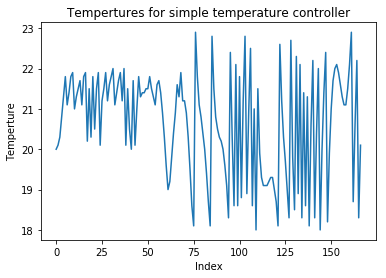

In [996]:
tmp = q2_1.iloc[:,1]
#ax = plt.gca()
#ax.set_ylim([1,30])
plt.plot([ i for i in range(len(tmp))], tmp)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple temperature controller')

In [989]:
q2_1.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
157,-3.6,21.1,O,1838,0.0,13,5.9
158,-2.8,21.1,O,1877,0.0,13,5.9
159,-1.4,21.5,O,1916,0.0,13,5.9
160,0.0,22.1,O,1955,0.1,14,6.0
161,1.2,22.9,O,1994,0.9,15,6.9
162,2.1,18.7,H,1999,0.0,15,6.9
163,2.5,20.6,O,2038,0.0,15,6.9
164,2.8,22.2,O,2077,0.2,16,7.0
165,2.5,18.3,H,2082,0.0,16,7.0
166,1.6,20.1,O,2121,0.0,16,7.0


In [970]:
q2_2=controlSimulatorOutput(d2,20,2,oriChangeFunc,'false',True)

Text(0.5,1,'Tempertures for simple temperature controller')

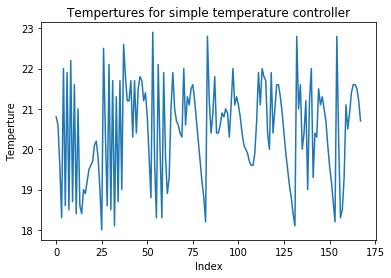

In [997]:
tmp = q2_2.iloc[:,1]
plt.plot([ i for i in range(len(tmp))], tmp)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple temperature controller')

In [981]:
q2_2.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
158,20.0,19.3,N,1440,0.0,9,4.8
159,22.9,21.1,N,1440,0.0,9,4.8
160,24.0,20.5,C,1452,0.0,9,4.8
161,25.2,20.9,C,1464,0.0,9,4.8
162,25.9,21.4,C,1476,0.0,9,4.8
163,25.8,21.6,C,1488,0.0,9,4.8
164,25.6,21.6,C,1500,0.0,9,4.8
165,25.4,21.5,C,1512,0.0,9,4.8
166,25.0,21.2,C,1524,0.0,9,4.8
167,24.2,20.7,C,1536,0.0,9,4.8


In [971]:
q2_3=controlSimulatorOutput(d3,20,2,oriChangeFunc,'false',True)

Text(0.5,1,'Tempertures for simple temperature controller')

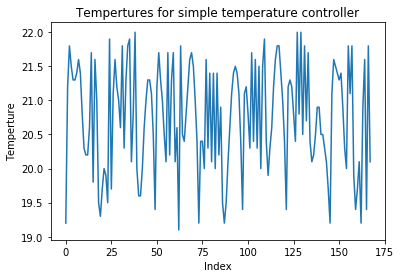

In [999]:
tmp = q2_3.iloc[:,1]
plt.plot([ i for i in range(len(tmp))], tmp)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple temperature controller')

In [982]:
q2_3.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
158,27.9,19.9,S,4184,0,0,0
159,28.9,19.4,S,4233,0,0,0
160,30.0,19.7,S,4282,0,0,0
161,30.5,20.1,S,4331,0,0,0
162,28.4,19.2,S,4380,0,0,0
163,26.5,20.9,C,4392,0,0,0
164,26.3,21.6,C,4404,0,0,0
165,27.3,19.4,S,4453,0,0,0
166,28.2,21.8,C,4465,0,0,0
167,28.3,20.1,S,4514,0,0,0


In [972]:
q2_4=controlSimulatorOutput(d4,20,2,oriChangeFunc,'false',True)

Text(0.5,1,'Tempertures for simple temperature controller')

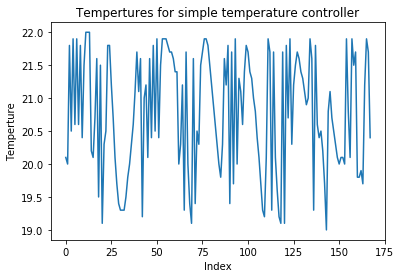

In [1000]:
tmp = q2_4.iloc[:,1]
plt.plot([ i for i in range(len(tmp))], tmp)
plt.xlabel('Index')
plt.ylabel('Temperture')
plt.title('Tempertures for simple temperature controller')

In [983]:
q2_4.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
158,25.1,21.5,C,1836,0,0,0
159,26.0,21.7,C,1848,0,0,0
160,27.8,19.8,S,1897,0,0,0
161,29.8,19.8,S,1946,0,0,0
162,30.1,19.9,S,1995,0,0,0
163,29.5,19.7,S,2044,0,0,0
164,26.7,21.2,C,2056,0,0,0
165,26.6,21.9,C,2068,0,0,0
166,25.5,21.7,C,2080,0,0,0
167,23.1,20.4,C,2092,0,0,0


### Q3

In [939]:
len(data_year)

8723

In [1004]:
ori_year_data_df = controlSimulatorOutput(data_year,20,2,oriChangeFunc,'false',True)

In [1006]:
ori_year_data_df.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
8713,25.1,21.5,C,134615,0.0,338,154.2
8714,26.0,21.7,C,134627,0.0,338,154.2
8715,27.8,19.8,S,134676,0.0,338,154.2
8716,29.8,19.8,S,134725,0.0,338,154.2
8717,30.1,19.9,S,134774,0.0,338,154.2
8718,29.5,19.7,S,134823,0.0,338,154.2
8719,26.7,21.2,C,134835,0.0,338,154.2
8720,26.6,21.9,C,134847,0.0,338,154.2
8721,25.5,21.7,C,134859,0.0,338,154.2
8722,23.1,20.4,C,134871,0.0,338,154.2


In [1007]:
ori_year_spent = ori_year_data_df.iloc[len(ori_year_data_df)-1,3]
ori_year_spent

134871

In [973]:
q3_r3=controlSimulatorOutput(data_year,20,3,oriChangeFunc,'false',True)

In [1001]:
q3_r3.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
8713,25.1,22.0,C,102688,0,0,0
8714,26.0,22.0,C,102700,0,0,0
8715,27.8,22.9,C,102712,0,0,0
8716,29.8,21.4,S,102761,0,0,0
8717,30.1,20.7,S,102810,0,0,0
8718,29.5,20.1,S,102859,0,0,0
8719,26.7,21.4,C,102871,0,0,0
8720,26.6,22.0,C,102883,0,0,0
8721,25.5,21.8,C,102895,0,0,0
8722,23.1,22.4,N,102895,0,0,0


In [1014]:
save = ori_year_spent - q3_r3.iloc[len(ori_year_data_df)-1,3]
save 

31976

In [974]:
q3_r4=controlSimulatorOutput(data_year,20,4,oriChangeFunc,'false',True)

In [1002]:
q3_r4.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
8713,25.1,22.4,C,79714,0,0,0
8714,26.0,22.2,C,79726,0,0,0
8715,27.8,23.0,C,79738,0,0,0
8716,29.8,21.4,S,79787,0,0,0
8717,30.1,23.7,C,79799,0,0,0
8718,29.5,21.6,S,79848,0,0,0
8719,26.7,22.2,C,79860,0,0,0
8720,26.6,22.4,C,79872,0,0,0
8721,25.5,23.9,N,79872,0,0,0
8722,23.1,23.7,N,79872,0,0,0


In [1015]:
save = ori_year_spent - q3_r4.iloc[len(ori_year_data_df)-1,3]
save 

54999

In [975]:
q3_r5=controlSimulatorOutput(data_year,20,5,oriChangeFunc,'false',True)

In [1003]:
q3_r5.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
8713,25.1,24.4,N,60732,0,0,0
8714,26.0,23.2,C,60744,0,0,0
8715,27.8,23.5,C,60756,0,0,0
8716,29.8,24.7,C,60768,0,0,0
8717,30.1,22.4,S,60817,0,0,0
8718,29.5,23.9,C,60829,0,0,0
8719,26.7,23.3,C,60841,0,0,0
8720,26.6,25.0,N,60841,0,0,0
8721,25.5,23.2,C,60853,0,0,0
8722,23.1,23.2,N,60853,0,0,0


In [1016]:
save = ori_year_spent - q3_r5.iloc[len(ori_year_data_df)-1,3]
save 

74018

### Q4

In [1005]:
new_year_data_df = controlSimulatorOutput(data_year,20,2,newChangeFunc,'false',True)

In [985]:
new_year_data_df.tail(10)

,External T,Interal T,Operation,Total Cents,Over Degrees,Over Times,Sum of the Degrees
8713,25.1,21.5,N,56130,0.0,156,64.8
8714,26.0,20.6,C,56142,0.0,156,64.8
8715,27.8,20.4,C,56154,0.0,156,64.8
8716,29.8,20.7,C,56166,0.0,156,64.8
8717,30.1,21.1,C,56178,0.0,156,64.8
8718,29.5,21.2,C,56190,0.0,156,64.8
8719,26.7,20.6,C,56202,0.0,156,64.8
8720,26.6,20.1,C,56214,0.0,156,64.8
8721,25.5,21.4,N,56214,0.0,156,64.8
8722,23.1,21.8,N,56214,0.0,156,64.8


In [1011]:
new_year_spent =  new_year_data_df.iloc[len(new_year_data_df)-1,3]
new_year_spent

56214

In [1012]:
how_many_years =  400000 / ( ori_year_spent - new_year_spent )
how_many_years

5.085370659953977